# Application of Linear Optimization to Game Theory
By Jordan Beary

## Preface
You'll notice that midway through this review I start putting all the puzzle pieces together and figure out that John von Neumann is the common denominator between linear programming and game theory. Regretfully, I didn't start by reading his work only to later find out that he was one of the founding fathers of both fields. I wanted to insert this preface because I found it incredibly satisfying to discover this, but also to explain to those who already knew about this link that it was not known to me in the early sections of the review. This was a humbling experience.

## Objective
Early on in the course, I struggled to see how game theory might be applied programmatically at scale. In an effort to take a programatical approach, I drew from previous course material on linear programming to see how the two could be combined. This notebook explores the intersection of optimization and game theory and aims to deepen my understanding of how best to apply linear optimization methods to simple games, more specifically simple two person zero-sum games. 

Additionally, my hope is that this way of presenting my findings is slightly more engaging for the reader and somewhat interactive given the mixture of mediums used -- graphical representation, short videos, and simple Python scripts for implementation. The material is reviewed in the same order as the path I took to understanding this topic -- from elementary to less elementary. 

*If you want to see the Python to make your own visualizations or to generate your own LP implementation just hit the button below*

In [10]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Introduction
Personally, it was difficult for me to ignore the overlap between game theory and linear optimization throughout the duration of this course. In all games, one of the primary assumptions is that agents act in their own interest to maximize utility or minimize loss of utility. In a paper titled [Evolutionary game dynamics](https://www.ams.org/journals/bull/2003-40-04/S0273-0979-03-00988-1/S0273-0979-03-00988-1.pdf) by Josef Hofbauer and Karl Sigmund, game theory is summarized as the following: 
> *At the risk of over-simplification, one can say that classical game theory deals with a rational individual, or ‘player’, who is engaged in a given interaction or ‘game’ with other players and has to decide between different options, or ‘strategies’, in order to maximise a ‘payoff’ which depends on the strategies of the co-players (who, in turn, attempt to maximise their payoff).*

Similarly, the primary goal of linear optimization or linear programming is to optimize an objective function subject to a system of linear constraints. This similarity was what sparked my interest in using linear programming methods to solve games. 

Linear optimization plays a central role in operations research and has many applications in industrial settings such as manufacturing (product mix optimization), sales operations (traveling salesman), and hospital logistics (nurse/doctor scheduling). To add a bit of color, lets use a bike company as an example. Jordan's Bike Co. makes four different types of bikes, which require different materials to make and different amounts of man hours to assemble. The four bikes also sell at different price points. Linear programming is perfectly equipped to handle problems like these, because we have a clear objective function, maximize profit, and a clearly defined set of linear constraints, available man-hours and bike parts/resources. As I stated in the objective, I have taken a course on optimization so the concepts covered on linear programming were not new to me. But I found this YouTube video a great refresher: 

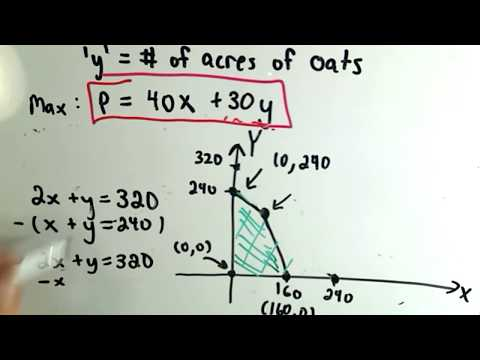

In [9]:
from IPython.display import YouTubeVideo
# an instructional/introductory video about solving linear programs.
# Video credit: patrickJMT.
YouTubeVideo('M4K6HYLHREQ',width=1024, height=576)

The difficulty comes with trying to conceptualize simple games within the linear programming framework. The objective function is naturally to maximize utility or minimize the loss of utility, but coming up with the set of constraints was challenging for me. The course where I was introduced to linear programming approached optimization from an operations research perspective so many of the problems I was familiar with dealt with resource constraints, which are not present in many games. I leaned on a number of great resources to help me with the endeavor.  

## Literature Review
Early days of my research on the topic, I found a ton of literature ranging from course material (introductory lecture slides) to complex research. This helped me to understand the principles and methodolgy and then how it was being applied. The progression of my literature review happend in this order: 

The following course material was a perfect starting point as it briefly explained linear programming and game theory separately and then the steps one should take to combine the two.  **The most significant finding from this material was the reoccurance of the Duality Theorem.** 
- [Linear Programming and Game Theory slides from Ron Parr at Duke University](https://www2.cs.duke.edu/courses/fall15/compsci570/lpandgames.pdf), starts by summarizing linear programming and the key elements of solving linear programs (LPs) graphically. At this point it is critical to introduce the canonical form of LPs. In general, every linear program takes on this form (as you saw in the video):

    \begin{align}&
    {\text{Maximize}}&&\mathbf {c} ^{\mathrm {T} }\mathbf {x} \\&
    {\text{subject to}}&&A\mathbf {x} \leq \mathbf {b} \\&
    {\text{and}}&&\mathbf {x} \geq \mathbf {0} 
    \end{align}

  This defines our objective function and set of constraints. The lecture goes on to very briefly introduce different types of LPs - integer, mixed-integer, and utilizing the Duality Theorem. As a visual learner, I thouroughly enjoy the graphical representation of linear programming and wanted to generate the graph from the LP example:

  You are a novice painter trying to decide which of the only two pieces of art you know how to paint you should sell more of. 
 - Painting A sells for \\$30, but requires 4 tubes of blue paint, 1 green, and 1 red. 
 - Painting B sells for \\$20, but requires 2 tubes of blue paint, 2 green, and 1 red. 
 - Since you are a novice painter, you can only afford to buy 16 tubes of blue paint, 8 green, and 5 red.

  LP Formulation:


\begin{aligned}&
{\text{Variables:}}&&A = Painting A, B = Painting B\\&
{\text{Objective:}}&&Maximize(30A + 20B)\\&
{\text{Subject to:}}&&4A + 2B \leq 16\\& 
{\text{and}}&&A + 2B \leq 8\\&
{\text{and}}&&A + B \leq 5\\&
{\text{and}}&&A,B \geq 0\\&
\end{aligned}



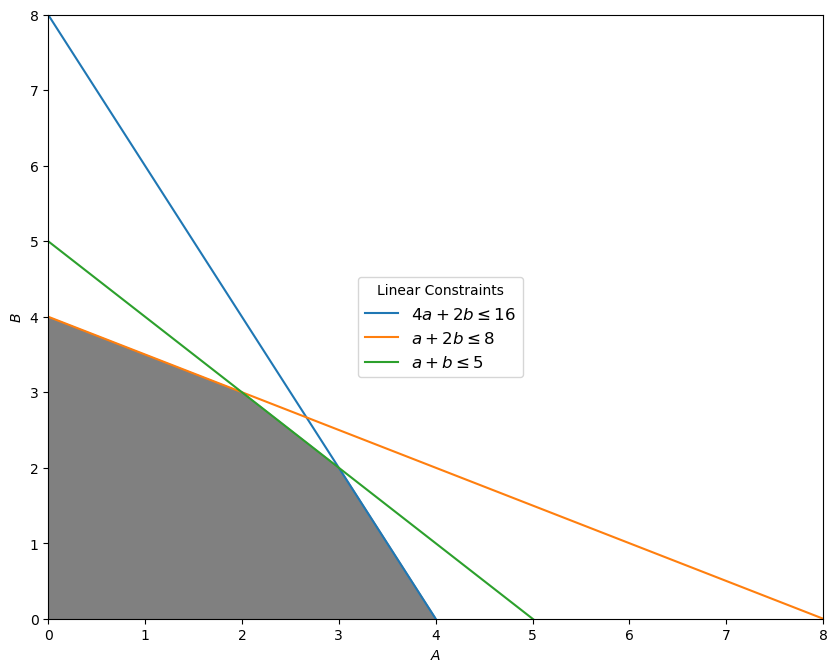

In [77]:
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')

# Construct lines
# A >= 0
x = np.linspace(0, 20, 2000)
# B >= 0
y1 = (x*0)
# 4a + 2b <= 16
y2 = (16-4*x)/2.0
# a + 2b <= 8 
y3 = (8-x)/2.0
# a + b <= 5 
y4 = -x+5

# Make plot
#plt.plot(x, y1)
plt.plot(x, y2, label=r'$4a + 2b\leq16$')
plt.plot(x, y3, label=r'$a + 2b\leq8$')
plt.plot(x, y4, label=r'$a + b\leq5$')
plt.xlim((0, 8))
plt.ylim((0, 8))
plt.xlabel(r'$A$')
plt.ylabel(r'$B$')

# Fill feasible region
y5 = np.minimum(y3,y4)
y6 = np.minimum(y2,y4)
y7 = np.maximum(0,0)
plt.fill_between(x, y5, y7, where=(y5>y7) & (y4<y2), color='grey')
plt.fill_between(x, y6, y7, where=(y6>y7) & (y4>y2), color='grey')
plt.legend(loc=(0.4,0.4), borderaxespad=0.,prop={'size': 12},title='Linear Constraints')

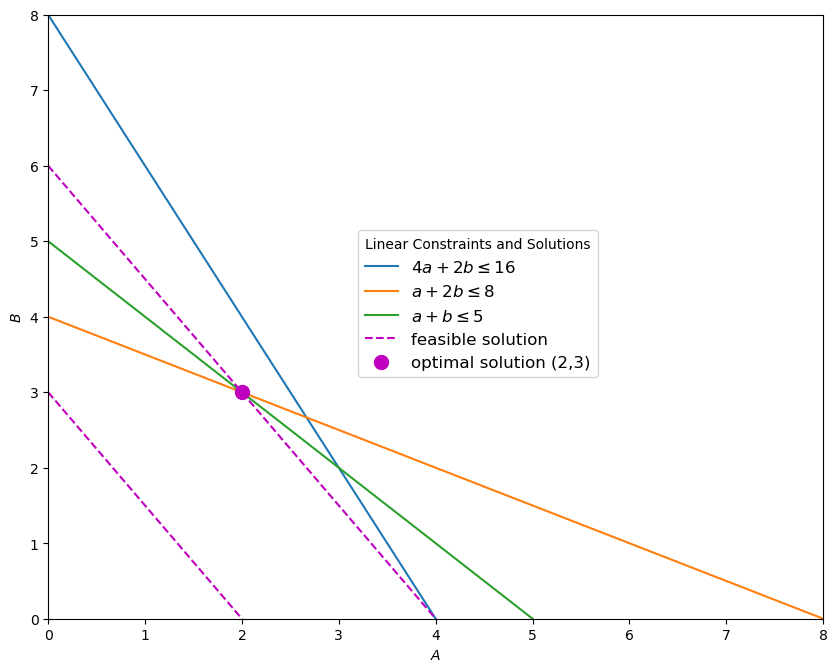

In [84]:
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')

# Construct lines
# A >= 0
x = np.linspace(0, 20, 10)
# B >= 0
y1 = (x*0)
# 4a + 2b <= 16
y2 = (16-4*x)/2.0
# a + 2b <= 8 
y3 = (8-x)/2.0
# a + b <= 5 
y4 = -x+5

# possible solution lines
y_no = (2-x)/(2/3)
y_op = (4-x)/(4/6)

# Make plot
#plt.plot(x, y1)
plt.plot(x, y2, label=r'$4a + 2b\leq16$')
plt.plot(x, y3, label=r'$a + 2b\leq8$')
plt.plot(x, y4, label=r'$a + b\leq5$')
plt.plot(x, y_no, '--m',label=r'feasible solution')
plt.plot(x, y_op, '--m')
plt.plot(2,3,'.m', label=r'optimal solution (2,3)',marker='o',markersize=10)
plt.xlim((0, 8))
plt.ylim((0, 8))
plt.xlabel(r'$A$')
plt.ylabel(r'$B$')

plt.legend(loc=(0.4,0.4), borderaxespad=0.,prop={'size': 12},title='Linear Constraints and Solutions')

- The above is an example of a graphical representation of an LP. In the first graph, we plot our constraints to establish the feasible solution area, which is filled in with grey. By definition any point within the grey area is feasible, but not necessarily optimal. Since the objective is to maximize revenue from our paintings the points that lie just within the bounds of our constraints give us the best chance at optimality. This set of points make up the Pareto frontier. In the second graph there are two dashed lines that are potential solutions to the problem. We can see the line connecting points (0,3) and (2,0) is well within the feasible area but clearly not optimal. On the other hand, the line connecting points (0,6) and (4,0) contain the optimal solution. Now the novice painter knows that they should chose to paint 2 of painting A and 3 of B. 

- The lecture goes on to describe how to formulate the linear program (LP) for a Rock, Paper, Scissors game (R-P-S) and Chicken. The main issue that I had with this later material is the lack of detail with which they describe the LP formulation. At this point I was still unclear on what types of games linear programming could be applied to. 
  
  Here are the slides that I found most useful:
  
R-P-S Equations | R-P-S LP  | R-P-S LP Formulation 
- | - | -
![alt text](duke-rps-lp/duke-rps-lp.png) | ![alt text](duke-rps-lp/duke-rps-lp1.png) | ![alt text](duke-rps-lp/duke-rps-lp2.png)

- [Linear Programming: Chapter 11 Game Theory from Robert J. Vanderbei at Princeton University](https://vanderbei.princeton.edu/542/lectures/lec8.pdf) is similar to the Duke lecture but focuses on the LP formulation for R-P-S and provides a deeper mathematical explanation of the steps. There were a couple of key nuggets that I gleaned from these lecture slides:
    
    1. Acknowledges the limitation of pure strategies (they use "deterministic strategies") within the linear optimization framework (although it is unclear if they are merely stating that for a repeated game of R-P-S a pure strategy will always lose to a mixed strategy). Leading me to believe that linear programming is either ill-suited for games where pure strategies are the solution or other solving methods just make more sense.
    2. A more formal representation of duality was given and how to formulate the LPs, but I still struggled understanding because of the short-form lecture slide style of presenting the information.

Next, I stumbled upon the single most helpful book on the two topics -- [AN INTRODUCTION TO LINEAR PROGRAMMING AND GAME THEORY by Paul R. Thie and G.E. Keough](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118165447). It answered almost every question that I had on the two topics in addition to the combination of the two. It is meant to be read linearly, like most textbooks, so skipping straight to Chapter 9 when linear programming is applied to game theory is not recommended. However, I got away with jumping around only after starting with Chapter 1. 
  
I found Chapter 1 critical for multiple reasons. First, it set up the assumptions that are used throughout the rest of the text and answered one of my initial questions which was what types of games are suitable for linear programming. From Section 1.4 I gathered that **linear programming can be used on a majority, if not all types of games**. However, Chapter 9 on two-person zero-sum games was really the only chapter where the author chose to neatly define the game in the canonical form, but states that the methodology transfers to two-person nonzero-sum games as well as cooperative and noncooperative games.
    
   > *Our first concern with games will be with two-person, zero-sum games. Although the extent of our assumptions may seem to limit the applicability of the theory, **this theory still serves as the foundation for the study of more complex games.** Moreover, two-person, zerosum games provide the opportunity to consider at a theoretical level the second stage in the process of applying mathematics, the formulation of the mathematical model.*
  
Second, the sections in Chapter 1 provided some much needed insight on what I needed to spend the most time on, which was mainly the concept of duality in Chapter 4.
    
   > *From our discussion so far, the problems of game theory and linear programming may seem to be totally unrelated, but this is not the case. Once our mathematical model for two-person, zero-sum games is developed, the problems of existence and calculation of a solution to a game will be related to the theory of linear programming. **Here the unifying concept will be the notion of duality. Duality will be introduced in Chapter 4, and the main theorem of that chapter, the Duality Theorem, will provide the answer to the principal question of our study of games, that is, the question of existence of a solution**.*

I found it satisfying that this textbook and the lecture slides placed equal importance on the Duality Theorem as the primary connection between game theory and linear programming. Before continuing with the textbook material, I should note that I turned to [Wikipedia for a brief introduction to the Duality Theorem](https://en.wikipedia.org/wiki/Duality_(optimization)) to get a general understanding of duality and it was at this point I had a big "Ah-ha" moment. When George Dantzig, founder of general form linear programming and the simplex method, arranged a meeting with John von Neumann, founder of game theory, to discuss his simplex method, Neumann immediately conjectured the theory of duality by realizing that the problem he had been working in game theory was equivalent. The textbook eloquently describes these types of relationships:

  > *Frequently in mathematics there exist relationships between concepts, systems, or problems that are not immediately apparent but, once understood, reap many dividends. [...] Relationships such as these not only can be used for practical or computational purposes, but also can provide a unified and coherent theory, so that insights and techniques from one system can contribute to the understanding and usefulness of another.*

This blew the topic open for me and I began to see the numereous similarities between the two fields. The duality principle states that an optimization model can be viewed from two perspecitves -- one from the primal form and one from the dual form. The textbook clarifies that the primal form can either have a *max form* or a *min form* depending on whether the objective function is maximizing or minimizing and it's dual form is it's opposite. The primal form takes on the canonical form, where the constants are in the objective function and variables are the set of constraints. But the dual form takes the constants from the primal form and uses them as constrained variables and takes the variables from the primal form and uses them as constraints. Here is a better explanation if the primal takes on the max form and a table detailing the transformation:

Primal Form (max) | Dual Form | Primal-to-Dual Transform
- | - | -
![alt text](intro-lp-gt/max-form.png) | ![alt text](intro-lp-gt/dual-form.png) | ![alt text](intro-lp-gt/dual-conversion.png)

It became obvious to me why the duality theorem was significant for two-person zero-sum games, because as one player is trying to maximize utility the other is trying to minimize loss of utility. However, it is not immediately apparent why it is so valuable for other types of games. That exploration will have to be further research of mine as the focus of this review is on two-person zero-sum games. With this newfound knowledge I was able to jump to Chapter 9 on Two-Person Zero-Sum Games. 

This chapter is rather dense, but I will attempt to pull out the most significant pieces in order to accomplish our goal of applying linear programming to games. It starts with an overview of game theory and walk-thrus of multiple examples. Next, the authors cover the basic principles of decision making in game theory, which we also covered in the beginning of the course. The remainder of the chapter is focused on setting up the core principles and mathematical definitions needed to describe LP formulation for the games of interest. 
   1. Principle I states that *Each player acts to maximize his or her security level*.
       - "Security level" is synonymous with guaranteed gain.
   2. Principle II states that *The players tend to use strategy pairs that are in equilibrium*

The game is considered solved by finding the strategies that satisfy these two principles. The next section explains saddle points in a game, but this is not entirely necessary to understand LP formulation for games. But here is a brief explanation:

If some entry $a_{ij}$ of the matrix $A$ has the property that..
1. $a_{ij}$ is the minimum of the ith row, and
2. $a_{ij}$ is the maximum of the jth column,

then we say $a_{ij}$ is a saddle point.

Another question I had from the course material was answered in the next section. The theory allows for solving pure and mixed strategy games, but the authors outlined that in most cases a mixed strategy is often the solution to a game when maximizing utility. Consider this payoff matrix as an example:

$$A = \begin{bmatrix} 1 & 3 \\ 4 & 0 \end{bmatrix}$$

We have that $u_{1} = 1$, so $P_1$ can secure 1 unit by always playing $s_1$. Consider, however, the result for $P_1$ of using the mixed strategy $X = \left( \frac{1}{2},\frac{1}{2} \right)$. If $P_2$ responds with $t_1$, the expected payoff is $1\left( \frac{1}{2} \right) + 4\left( \frac{1}{2} \right) = \frac{5}{2}$ and if $P_2$ responds with $t_2$ the expected payoff is $\frac{3}{2}$. In fact, if $P_2$ uses strategy $Y = \left( y_1,y_2 \right)$, the expected payoff is


\begin{aligned}
\left( \frac{1}{2},\frac{1}{2} \right) \begin{bmatrix} 1 & 3 \\ 4 & 0 \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} &= \left( \frac{5}{2},\frac{3}{2} \right) \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} \\
&= \frac{5}{2}y_1 + \frac{3}{2}y_2 \\
&\geq \frac{3}{2}y_1 + \frac{3}{2}y_2 \\
&= \frac{3}{2} \left( y_1 + y_2 \right) \\
&= \frac{3}{2}
\end{aligned}

So by using the mixed strategy $\left( \frac{1}{2},\frac{1}{2} \right)$, $P_1$ has secured an expected payoff of $\frac{3}{2}$, because no matter what $P_2$ plays, we have $\left( \frac{1}{2},\frac{1}{2} \right)AY^t \geq \frac{3}{2}$. Now we can say that a general definition for the security level of a mixed strategy $X_1$ for $P_1$to be 

$$
\min\limits_{Y \in T}X_1AY^t
$$

and the security level of a mixed strategy $Y_1$ for $P_2$ to be

$$
\DeclareMathOperator*{\Max}{Max}
\Max\limits_{X \in S}XAY_1^t
$$

With this in mind, we can start to optimize the security level with mixed strategies. Here is a definition that will be used for the remainder of the review:
![alt text](intro-lp-gt/op-sec-lvl.png)

Giving rise to the Fundamental Theorem of Game Theory, first proved by John von Neumann:

![alt text](intro-lp-gt/fun-gt.png)


The text goes on to proof out the LP formulation, but I found that it was somewhat difficult to track and therefore returned to simpler descriptions. However, it can't be overstated how much I used [AN INTRODUCTION TO LINEAR PROGRAMMING AND GAME THEORY by Paul R. Thie and G.E. Keough](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118165447) to understand the underlying principles and definitions of linear programming with respect to game theory. Had I not found this resource I'm sure that the connection between the two fields and the all-important discovery of John von Neumann being the common denominator  who linked the two, would still be mystery for me. 

To wrap up the literature review, I want to return briefly to the simpler description that I alluded to above as a transition into a toy implementation in Python. [This PDF of R-P-S LP formulation by David Phillips at USNA](https://www.usna.edu/Users/math/dphillip/sa305.s15/phillips/solutions/rock-paper-scissors.sol.pdf) brought me full circle by ending with some lecture notes. Pictured here are the two LPs for the two-person zero-sum game of Rock,Paper,Scissors:

![alt text](rps-lp.png)





## Python Implementation
To wrap up this review of linear programming applied to game theory, I wanted to show an example of a Rock,Paper,Scissors implementation using Python and the [CVXOPT package](https://cvxopt.org/). All credit goes to Evan Hennis as I stumbled upon his YouTube video which you can watch below.

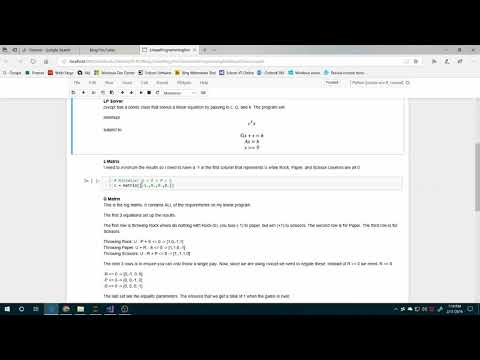

In [85]:
from IPython.display import YouTubeVideo
# Python implementation of R-P-S using the CVXOPT package.
# Video credit: Evan Hennis.
YouTubeVideo('GI4KXwmLTU4',width=1024, height=576)

In [86]:
from cvxopt import matrix, solvers
glpksolver = 'cvxopt_glpk'
solvers.options['show_progress'] = False
solvers.options['LPX_K_MSGLEV'] = 0

In [87]:
# Minimize: U + R + P + S
c = matrix([-1.,0.,0.,0.])

In [88]:
G = matrix(
    [
        [ 1., 1., 1., 0., 0., 0., 0., 0.],
        [ 0., 1.,-1.,-1., 0., 0., 1.,-1],
        [-1., 0., 1., 0.,-1., 0., 1.,-1.],
        [ 1.,-1., 0., 0., 0.,-1., 1.,-1.]
    ])

In [89]:
h = matrix([0.,0.,0.,0.,0.,0.,1.,-1.])

In [90]:
sol = solvers.lp(c,G,h, solver=glpksolver)
print(sol['status'])
print(sol['x'])

optimal
[ 2.04e-10]
[ 3.33e-01]
[ 3.33e-01]
[ 3.33e-01]



## Summary
The things I learned:
 1. Always start a literature review by reading up on the founding fathers of the material of interest...John von Neumann was an incredible mathematician.
 2. All games can be converted into linear programs with the use of the Duality Theorem as foundation.
 3. How to convert two-player zero-sum games into linear programs and how to build a python program that will find the optimal strategy.
 
## Future Work
As I stated, the focus was on two-person zero-sum games but I would like to invest some time in the future on converting cooperative games into linear programs. To me, the constraints are even more difficult to intuit. Additionally, the python implementation was one of the most basic examples I found, but as I stated in the earliest sections of the review, ideally LPs would be used for solving larger scale games and I would like to eventually build a program at that level. 

## References
Here are all of the references I used throughout my research:
GT project research:
1. [GAME THEORY PROBLEMS BY AN ALTERNATIVE SIMPLEX METHOD](https://www.researchgate.net/publication/273301090_GAME_THEORY_PROBLEMS_BY_AN_ALTERNATIVE_SIMPLEX_METHOD)

2. [Linear Programming and Game Theory slides from Ron Parr at Duke University](https://www2.cs.duke.edu/courses/fall15/compsci570/lpandgames.pdf)
3. [Linear Programming: Chapter 11 Game Theory from Robert J. Vanderbei at Princeton University](https://vanderbei.princeton.edu/542/lectures/lec8.pdf)

3. [AN INTRODUCTION TO LINEAR PROGRAMMING AND GAME THEORY by Paul R. Thie and G.E. Keough](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118165447) 

4. [Matrix Game](https://optimization.mccormick.northwestern.edu/index.php/Matrix_game_(LP_for_game_theory))

5. [Applying Optimization in Game Theory](https://optimization.mccormick.northwestern.edu/index.php/Applying_Optimization_in_Game_Theory)

6. [An Optimization Model Based on Game Theory](https://pdfs.semanticscholar.org/2c3b/1e9967629dddce2b3b8aaa5ce9b444ab691d.pdf)

7. [Coevolutionary Augmented Lagrangian Methods for Constrained Optimization](https://ieeexplore-ieee-org.proxy.lib.pdx.edu/stamp/stamp.jsp?tp=&arnumber=850652A)

8. [GAMES AND DUALITY](https://sites.math.washington.edu/~burke/crs/515/notes/nt_6.pdf)

9. [Linear Programming, Lagrange Multipliers, and Duality](http://www.cs.cmu.edu/~ggordon/lp.pdf)

10. [GAME THEORY](https://www.math.ucla.edu/~tom/Game_Theory/mat.pdf)

11. [Duality in Linear Programming](http://web.mit.edu/15.053/www/AMP-Chapter-04.pdf)